In [1]:
#Google Colab File -ashutoshtiwari13

import gym
import numpy as np
import random
import math
from collections import defaultdict,deque
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")

env =gym.make('CliffWalking-v0')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [2]:
def plot_values(V):
	# reshape the state-value function
	V = np.reshape(V, (4,12))
	# plot the state-value function
	fig = plt.figure(figsize=(15,5))
	ax = fig.add_subplot(111)
	im = ax.imshow(V, cmap='cool')
	for (j,i),label in np.ndenumerate(V):
	    ax.text(i, j, np.round(label,3), ha='center', va='center', fontsize=14)
	plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
	plt.title('State-Value Function')
	plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


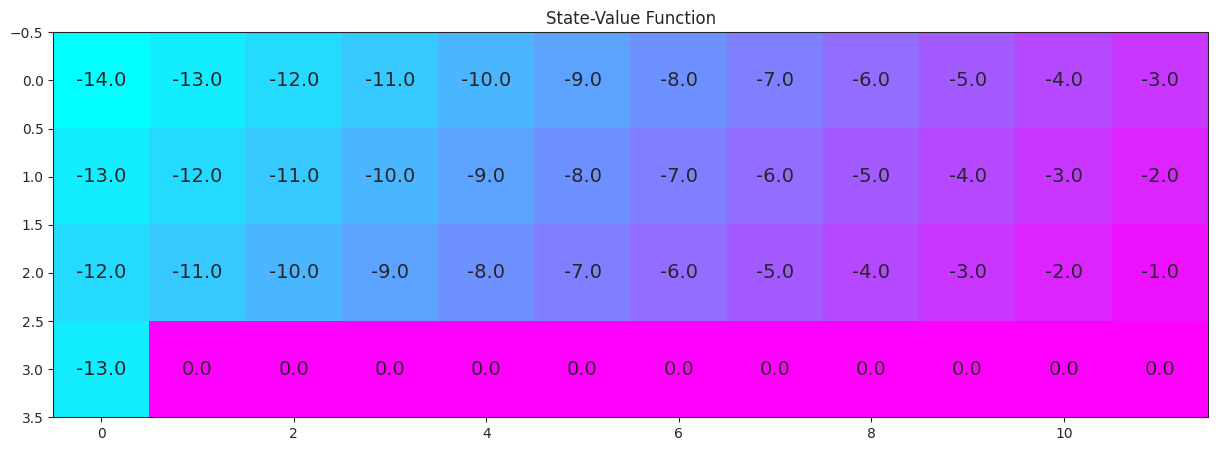

In [4]:
#Optimal state-value fucntion
V_opt = np.zeros((4,12))
V_opt[0][0:13]= -np.arange(3,15)[::-1]
V_opt[1][0:13]= -np.arange(3,15)[::-1]+1
V_opt[2][0:13]= -np.arange(3,15)[::-1]+2
V_opt[3][0] = -13

plot_values(V_opt)

In [5]:
#Expected Sarsa Temporal Difference control
def expsarsa_update(alpha , gamma ,nA, eps, Q, state , action,reward, next_state =None):
  current = Q[state][action]
  """Expected value of the next state-action pair where the expectation takes into account
  the probablity that the agent selects each possible action from the next state """

  policy = np.ones(nA) * eps/nA
  best_action = np.argmax(Q[next_state])
  policy[best_action] = 1 - eps + (eps / nA)     #assigning the next bulk of the probablity to non-greedy step
  Qsa_next = np.dot(Q[next_state], policy)

  target = reward + (gamma * Qsa_next)
  new_value = current  + (alpha *(target - current))
  return new_value

def epsilon_greedy(Q, state, nA, episode):
  if random.random() > episode:
    return np.argmax(Q[state])
  else:
    return random.choice(np.arange(nA))

In [6]:
def generate_episode(Q, nA , eps, alpha, plot_every=100,gamma=1.0):
  score =0
  scores = deque(maxlen = plot_every)
  state = env.reset()
  while True:
    action = epsilon_greedy(Q, state, nA, eps)
    next_state, reward, done , info = env.step(action)
    score +=reward

    Q[state][action] = expsarsa_update(alpha, gamma , nA, eps, Q, state, action , reward , next_state)
    state = next_state
    if done:
      scores.append(score)
      break
  return scores



In [8]:
def expected_sarsa_td_control_with_plot(env, num_episodes, alpha, gamma=1.0, plot_every=100):

  nA= env.action_space.n
  Q = defaultdict(lambda: np.zeros(nA))
  avg_scores = deque(maxlen = num_episodes)

  for episode in range(1, num_episodes+1):
    if episode % 100 ==0:
      print("\r Epsiode :{}/{}.".format(episode,num_episodes),end="")
    eps = 0.005

    estimated_scores = generate_episode(Q, nA , eps, alpha)
    if (episode % plot_every ==0):
      avg_scores.append(np.mean(estimated_scores))

  plt.plot(np.linspace(0, num_episodes, len(avg_scores), endpoint=False), np.array(avg_scores))
  plt.xlabel("Episode Number")
  plt.ylabel("Average reward Over %d rewards" % plot_every)
  plt.show()

  print(("Best Average reward over %d Epsiode: " % plot_every), np.max(avg_scores))
  return Q , np.max(avg_scores)

In [9]:
def expected_sarsa_td_control(env, num_episodes, alpha, gamma=1.0, plot_every=100):

  nA= env.action_space.n
  Q = defaultdict(lambda: np.zeros(nA))
  avg_scores = deque(maxlen = num_episodes)

  for episode in range(1, num_episodes+1):
    if episode % 100 ==0:
      print("\r Epsiode :{}/{}.".format(episode,num_episodes),end="")
    eps = 0.005

    estimated_scores = generate_episode(Q, nA , eps, alpha)
    if (episode % plot_every ==0):
      avg_scores.append(np.mean(estimated_scores))
  return Q , np.max(avg_scores)

In [10]:
num_episodes = 10000
# Define a range of hyperparameter values to test
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]
gammas = [0.8, 0.85, 0.9, 0.95, 1.0]


In [12]:
best_result = -float('inf')
best_hyperparameters = None

for alpha in alphas:
    for gamma in gammas:
      Q_expectedsarsa, max_avg_score = expected_sarsa_td_control(env,num_episodes, alpha=alpha, gamma=gamma)
      if max_avg_score > best_result:
        best_result = max_avg_score
        best_hyperparameters = (alpha, gamma)
        best_Q = Q_expectedsarsa

 Epsiode :10000/10000.

In [13]:
best_hyperparameters

(0.1, 0.8)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 Epsiode :10000/10000.

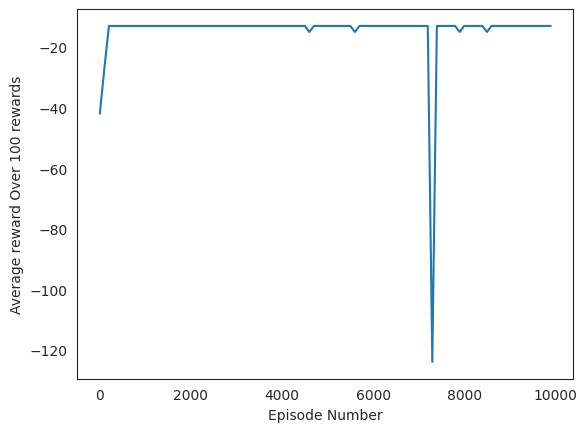

Best Average reward over 100 Epsiode:  -13.0


In [15]:
Q_expectedsarsa, max_avg_score = expected_sarsa_td_control_with_plot(env,10000, alpha=0.1, gamma=0.8)

defaultdict(<function expected_sarsa_td_control_with_plot.<locals>.<lambda> at 0x783cb2a6d000>, {36: array([-13.97531476, -89.92467403, -14.15349199, -14.63353128]), 24: array([-12.99084164, -12.97320732, -14.25236164, -13.41999   ]), 12: array([-12.18812909, -12.1986319 , -12.22561091, -12.1837687 ]), 0: array([-11.69164912, -11.68397865, -11.74120735, -11.70294433]), 1: array([-11.20203793, -11.13401162, -11.16148992, -11.24128406]), 2: array([-10.40184885, -10.4212323 , -10.42344992, -10.55883055]), 3: array([-9.70174286, -9.66786561, -9.68639975, -9.66077334]), 4: array([-8.90146127, -8.84992973, -8.9231623 , -8.90098191]), 5: array([-8.09763697, -8.02214538, -8.07737241, -8.02370651]), 6: array([-7.20132515, -7.18698483, -7.19968686, -7.25628627]), 7: array([-6.40118872, -6.33318272, -6.36267533, -6.36270802]), 8: array([-5.5010271 , -5.48048856, -5.48948661, -5.54587696]), 9: array([-4.69489103, -4.6233217 , -4.63733988, -4.72506418]), 10: array([-3.80068231, -3.77564582, -3.7881

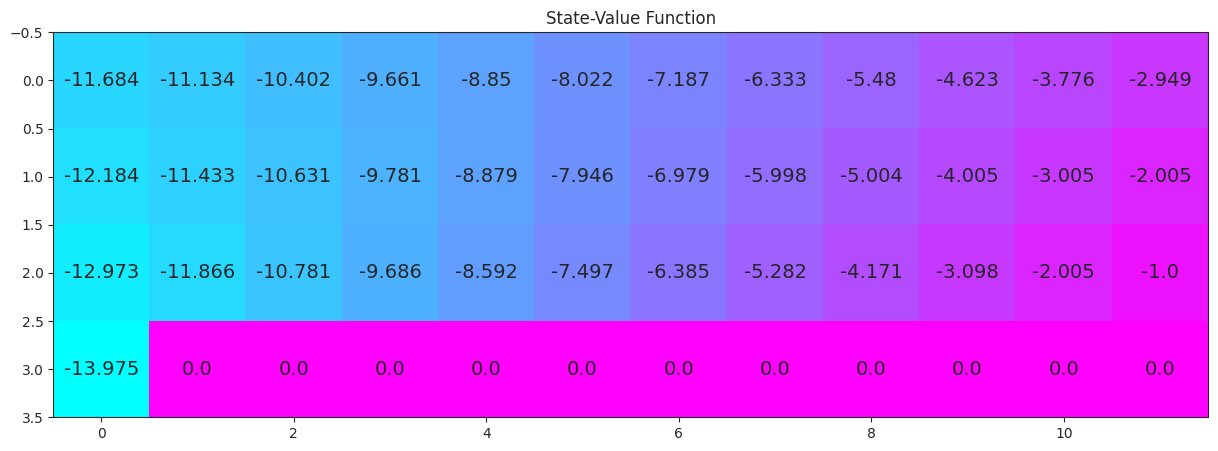

In [16]:
# Estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expectedsarsa[key]) if key in Q_expectedsarsa else -1 for key in np.arange(48)]).reshape(4,12)
print(Q_expectedsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expectedsarsa[key]) if key in Q_expectedsarsa else 0 for key in np.arange(48)])